In [1]:
import json
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as scs
import numpy as np
%config InlineBackend.figure_format = 'retina'

# How to figure out what's real

**TODO**: OBJECTIVES

**TODO**: so much more checking for understanding
cold call, polling, breakout questions

too long on CLT

comes brefore bayes day, maybe hints

non-causal first motivation section would be confusing
-- don't have a lto of experience with this, so I'd be training them all wrong
-- lead with the right way, say "don't confuse this with the wrong way"

"p value as vote of no confidence" works

ALWAYS SET ALPHA FIRST
-- why set different? because the cost of overturing it would be huge? why though?

IT'S PRETTY COOL NOT PRETTY CRAZY

not bootstrapping; is simulation

use clear notation and refer to clear notation, eg "x" and "x bar" instread of sampling distribution of sampling distribution of sampling distribution BLOWS UP




It's useful to know what's real. Is the earth flat or round? Are cats bigger than dogs? But how do we find out? We have two assets:

1. What we already think is real.
2. New data generated by reality.

Err on the side of (1) and you risk continuing previous errors - saying the world is flat because that's what people always said. Err on the side of (2) and you risk overwhelming wisdom with biased, noisy, or incomplete data - saying the world is flat because it doesn't look round from where you stand.

Frequentist Hypothesis Testing provides a powerful and general set of tools for combining these two assets, my providing a **principled procedure** for deciding when to **update a previous worldview** in light of **new data**.

## Prelude: exploratory data analysis

With **exploratory** data analysis, we put the **data** first, by using measurements to produce estimates of ground truth. For example, we might start with a noisy measurement from a scale and ask about the likelihood of different weights.

`[SCALE MEASUREMENT] --> [WEIGHT]`

For example, imagine I have a scale that adds gaussian noise with a standard deviation of `0.5`. From this scale I measure `201 lbs`. In the measurement-first paradigm, I'd plot the PDF of the likely weights, and use it to inform estimates of the true weight.

In [2]:
measurement = 201.
meas_error = 0.5
dist = scs.norm(loc=measurement, scale=meas_error)

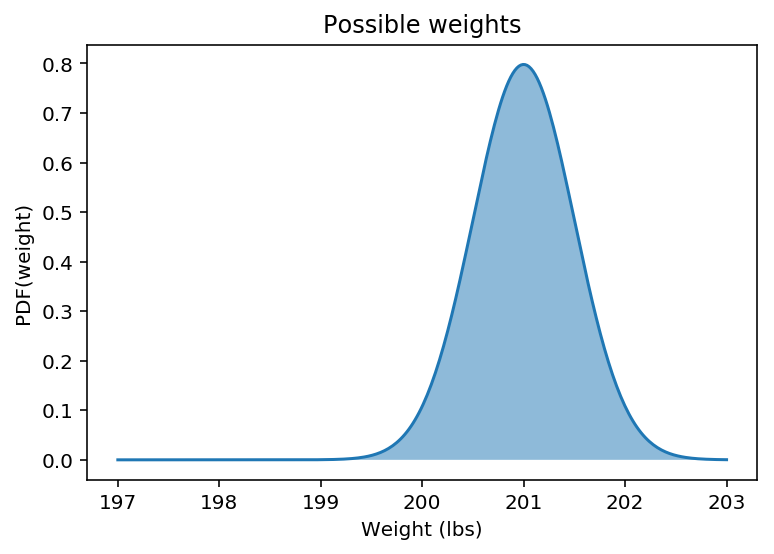

In [3]:
weights = np.linspace(197,203,300)
plt.fill_between( weights, 0, dist.pdf(weights), alpha=0.5 )
plt.plot( weights, dist.pdf(weights))
plt.xlabel("Weight (lbs)")
plt.ylabel("PDF(weight)")
plt.title("Possible weights")
plt.show()

At this point we could estimate the most likely weight:

In [4]:
dist.mean() #most likely value is the mean for normal distributions

201.0

The 95% confidence interval:

In [5]:
dist.mean() - 2*meas_error, dist.mean() + 2*meas_error

(200.0, 202.0)

Or the probability that the weight is within some arbitrary range:

In [6]:
dist.cdf(201.5) - dist.cdf(201.3)

0.11559786381860893

Advantages
* Doesn't require a prior
* Produces an estimate

Disadvantages:
* Causal model is all wrong - measurement doesn't cause the ground truth.
* Sensitive to noise.

## Hypothesis testing: confirmatory data analysis

With **confirmatory** data analysis, we put the **prior** first by using ground truth estimates to evaluate measurements. For example we might start out with a weight and ask measurements a noisy scale would produce.

`[WEIGHT] --> [SCALE MEASUREMENT]`

In [7]:
weight = 200.
meas_error = 0.5
dist = scs.norm(loc=weight, scale=meas_error)

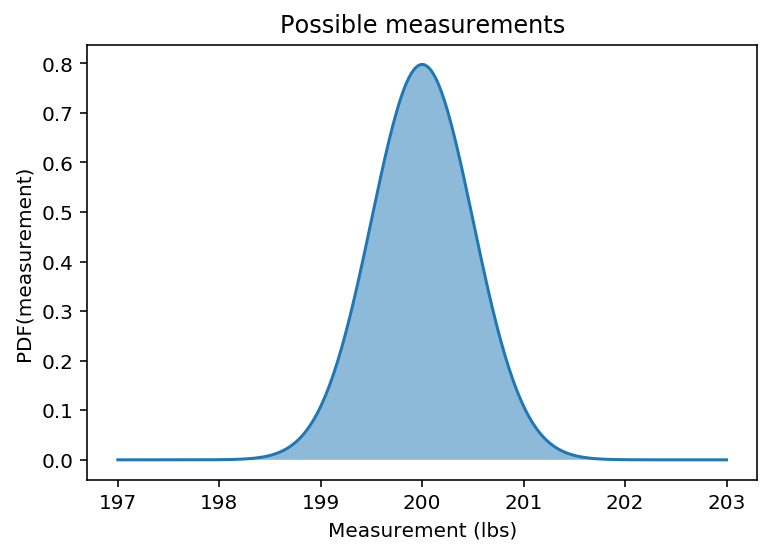

In [8]:
measurements = np.linspace(197,203,300)
plt.fill_between( measurements, 0, dist.pdf(measurements), alpha=0.5 )
plt.plot( measurements, dist.pdf(measurements))
plt.xlabel("Measurement (lbs)")
plt.ylabel("PDF(measurement)")
plt.title("Possible measurements")
plt.show()

At this point we can make probabilistic statements about **measurement**. For example the chance that a measurement would be greater than `201 lb` is:

In [9]:
1-dist.cdf(201)

0.02275013194817921

The advantages and disadvantages to this approach compliment the EDA approach:

Advantages
* Correct causal model - ground truth causes the measurement
* Ground truth estimate not sensitive to measurement noise

Disadvantages
* Requires a prior estimate
* **Doesn't produce an estimate**!

This last point might seem disasterous. What good is this? Hypothesis Testing gives us a way to make a **vote of no confidence** on a status-quo world-view.

Let's illustrate it with an example. We might have a prior estimate weight of `200 lb`, and then a measurement of `201 lb`. In the paradigm of EDA, we might ask - given a measurement of 201, what is the chance of 200 or less? But in the Hypothesis Testing paradigm we ask - given a weight of 200, what is the chance of a measurement 201 or greater?

In [10]:
1-dist.cdf(201)

0.02275013194817921

In this case, the chance of this observation given this prior estimate is small - about 2%. This may lead us to **reject** our prior estimate. 

This is the end result of confirmatory data anlysis - instead of an estimate, generates a **boolean vote** on whether to continue accepting the current worldview.

## Hypothesis Testing Formalized

* $H_0$, "null hypothesis": the prior estimate or condition or status quo worldview.
 * e.g., "world is flat", "weighs 200 lbs"
* $H_1$, "alternative hypothesis": the opposite of that **TODO** 
 * e.g., "world is round", "does not weigh 200 lbs"
* $\alpha$, "confidence threshold": the degree of certainty that you need in order to reject the null hypothesis.
* $p$, "p-value" **TODO** better name?: 
* $data$ **TODO**
 
Hypothesis Testing is concerned with finding the probability $p$ of encountering a measurement more extreme than $data$ given the null hypothesis $H_0$. 

If the "probablity of the null hypothesis given data" $p < \alpha$ then:
* reject the null hypothesis in favor of the alternative hypothesis

else:
* continue to accept the status quo

## Why though?

This formulation is sort of peculiar, and the answers it offers are limited. In exchange, you get access to a big pile of statistical tests for finding $p$.

In particular, this formulation allows us to leverage the central limit theorem to build group experiments.




## Basic example: butter

A hypothesis is proposed: eating a quarter stick of butter during breakfast increases your IQ. Twenty people are chosen at random to participate in the experiment. After eating butter at breakfast for a week, their IQ test scores are:

In [11]:
iq_sample = [105, 123,  81, 116,  87,  89,  88, 129, 119,  90, 119,  98, 112,
             114,  93,  85,  98, 120, 116, 118]

print( "butter eater mean IQ:", np.mean(iq_sample) )

butter eater mean IQ: 105.0


The IQ in the general population is normally distributed with $\mu = 100$ and $\sigma = 15$.

To get started answering the question, we phrase it in the language of hypothesis testing:

Do we have sufficient evidence to overturn our default assumption that butter-eating is unrelated to intelligence?

More specifically: what fraction of randomly sampled 20-person groups from the general population have a mean IQ higher than 105.0?

In [12]:
dist = scs.norm(loc=100, scale=15) # iq ~ N(100,15)

group_size = 20
n_samples = 30000
sample_means = dist.rvs(size=(n_samples,group_size)).mean(axis=1)

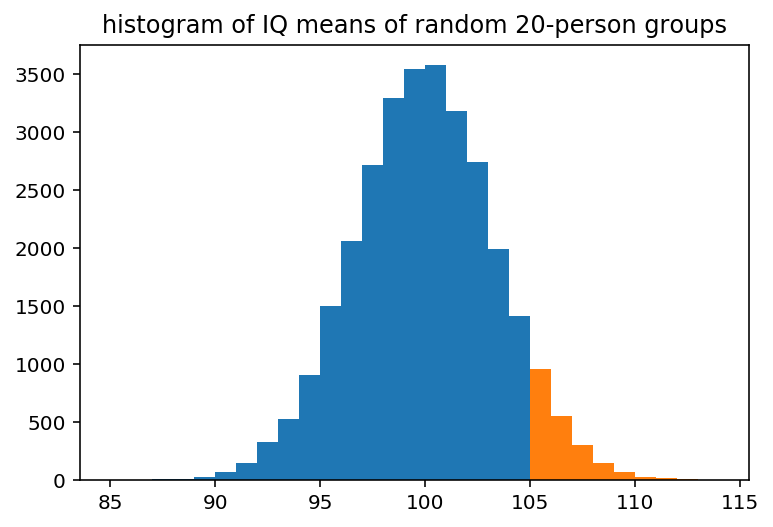

In [13]:
plt.title("histogram of IQ means of random 20-person groups")
plt.hist( sample_means[sample_means<105], bins=np.arange(85,106) )
plt.hist( sample_means[sample_means>=105], bins=np.arange(105,115) )
plt.show()

In [14]:
(sample_means > 105.0).sum() / n_samples

0.06786666666666667

By running tens of thousands of samples we can say that about 7% of 20-person non-butter groups have a _greater_ mean IQ than our test group.

Under conditions of the null hypothesis, we'd see our data or greater about 7% of the time; this is our `p` value. alpha=0.05 is a typical confidence threshold; most experimenters would not find p=0.07 to be sufficient to reject the null hypothesis.

## Closed Form Now: The Central Limit Theorem

It took a lot of flapping to get here. Is there an easier way?

The Central Limit Theorem provides a closed-form expression for the above distribution.

**TODO** the right symbols
$$\mu = \mu_{pop}$$
$$\sigma = \frac{\sigma_{pop}}{\sqrt{n}}$$

In [15]:
dist_samplemeans = scs.norm(loc=100, scale=15/20**0.5)

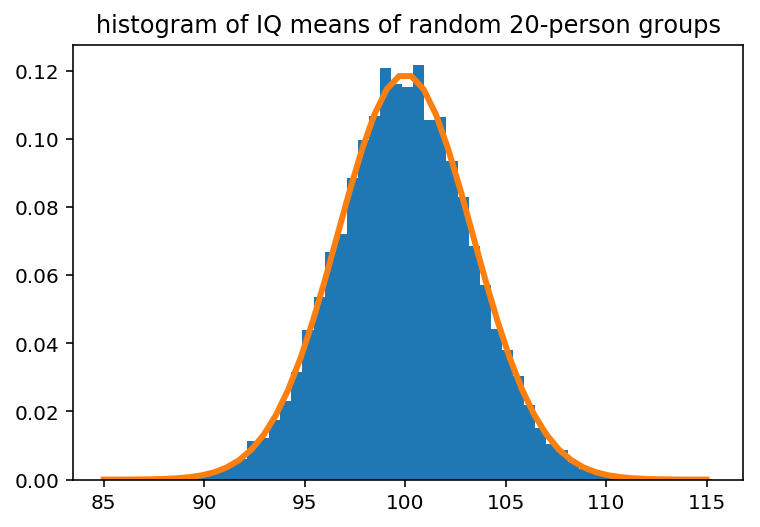

In [16]:
plt.title("histogram of IQ means of random 20-person groups")
plt.hist( sample_means, bins=50, density=True )
iqspace = np.linspace(85,115)
plt.plot( iqspace, dist_samplemeans.pdf(iqspace), lw=3 )
plt.show()

From this we can directly pluck the $p$ value.

In [17]:
1-dist_samplemeans.cdf(105.0)

0.06801856405707174

## What about non-normal population distributions?

The above closed-form solution assumes the sample distribution of sample means following a normal distribution. This is intuitive: IQ follows a normal distribution, and it follows that samples drawn from it would also follow a normal distribution.

The power of the central limit theorem is that it applies to _non_-normal distributed populations.

### Example: bicycle idle times

The amount of time that Jump bicycles in Santa Cruz sit between rentals follows an exponential distribution with a $\beta=2.8$ hours [1]. 

[1] Katelyn Walker!

In [18]:
beta = 2.8
dist = scs.expon(scale=beta)

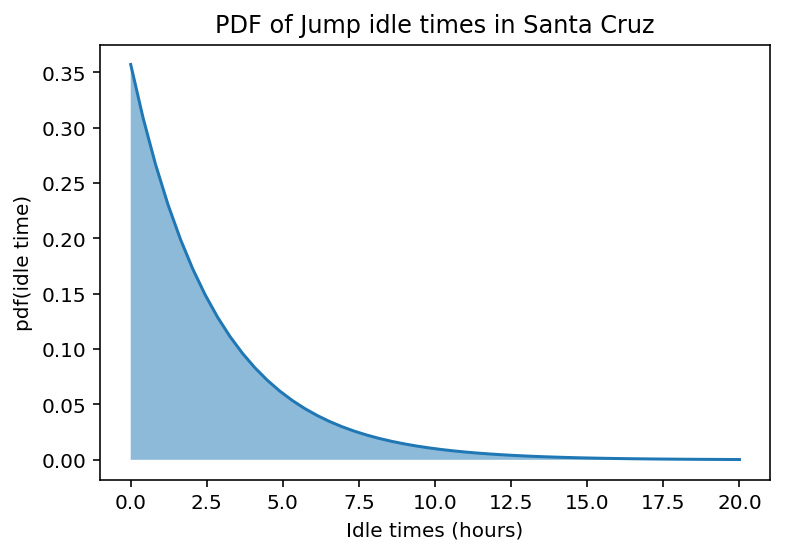

In [19]:
waittimes = np.linspace(0,20)
plt.plot( waittimes, dist.pdf(waittimes) )
plt.fill_between( waittimes, 0, dist.pdf(waittimes), alpha=0.5 )
plt.title("PDF of Jump idle times in Santa Cruz")
plt.xlabel("Idle times (hours)")
plt.ylabel("pdf(idle time)")
plt.show()

A hypothesis is proposed: painting the bikes yellow will reduce idle times. Some bicycles are painted yellow, and 100 idle times were collected.

In [20]:
np.random.seed(20)
idle_sample = scs.expon(scale=2.6).rvs(100).round(2)
idle_sample

array([2.31, 5.93, 5.78, 4.4 , 0.1 , 3.06, 1.24, 1.9 , 2.79, 0.56, 0.83,
       3.3 , 3.97, 4.94, 3.88, 0.1 , 0.32, 3.62, 0.71, 0.76, 5.07, 7.78,
       2.14, 0.51, 3.82, 1.76, 2.59, 4.76, 1.61, 1.79, 2.96, 2.74, 0.81,
       0.18, 3.84, 1.71, 1.04, 1.86, 0.8 , 0.97, 2.56, 2.12, 1.  , 1.31,
       0.78, 2.27, 0.46, 2.37, 4.54, 0.44, 3.45, 1.37, 3.92, 4.24, 4.01,
       2.33, 2.84, 2.7 , 1.44, 1.87, 1.81, 0.1 , 3.2 , 2.52, 3.91, 1.6 ,
       1.24, 0.9 , 2.12, 0.23, 2.59, 7.52, 5.77, 5.48, 1.1 , 3.16, 1.95,
       2.8 , 0.81, 2.43, 0.13, 3.09, 0.92, 0.47, 1.05, 0.47, 6.4 , 0.87,
       0.3 , 0.32, 3.66, 4.75, 0.09, 0.34, 5.76, 1.88, 6.71, 2.26, 3.86,
       1.43])

In [21]:
idle_sample.mean()

2.4126000000000003

In this experiment, the mean idle time decreased to 2.4 hours. Promising; let's follow the same procedure as above to find the fraction of 100-sample means have a more extreme result.

In [22]:
n_samples = 30000
group_size = 100
group_means = dist.rvs(size=(n_samples,group_size)).mean(axis=1)

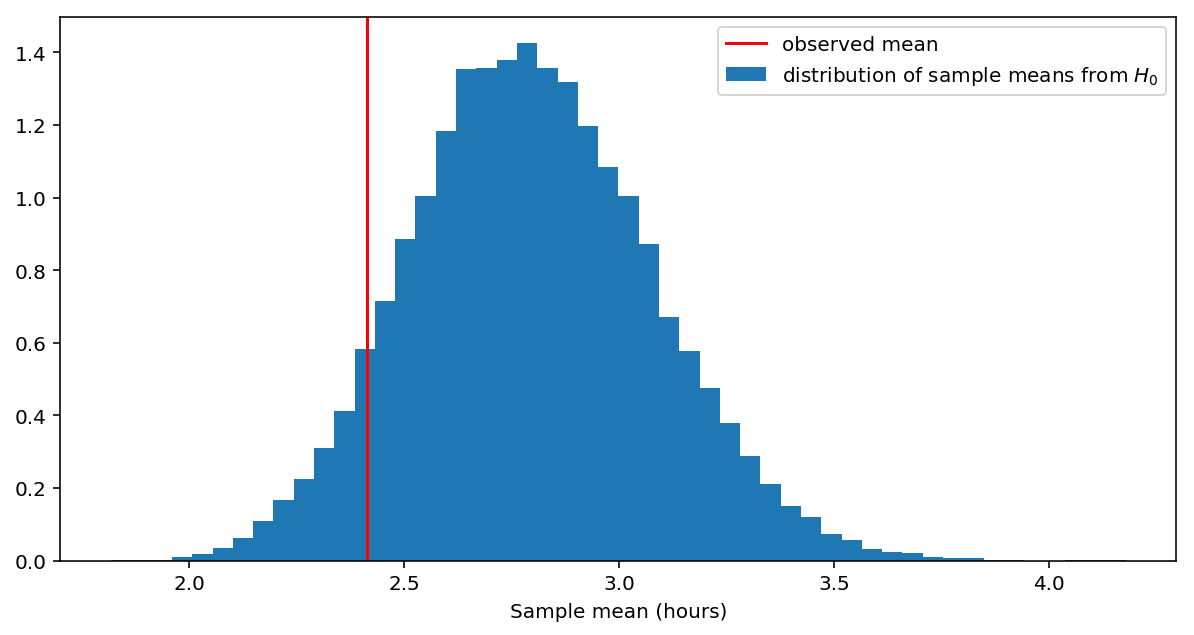

In [23]:
plt.figure(figsize=(10,5))
plt.hist( group_means, bins=50, density=True, label="distribution of sample means from $H_0$" )
plt.axvline( idle_sample.mean(), c="red", label="observed mean" )
plt.xlabel("Sample mean (hours)")
plt.legend()
plt.show()

In [24]:
(group_means < idle_sample.mean()).sum() / n_samples

0.07993333333333333

Using random sampling we can see that a 100-item sample mean < 2.4 hours is actually relatively common. Our experiment doesn't provide strong evidence of our hypothesis.

Look, though, something interesting! Despite our population following a non-normal distribution, the sample means are normally distributed. Can we again use the CLT to save ourselves some compute?

In [25]:
clt_sample_dist = scs.norm(loc=beta, scale=beta/group_size**0.5)

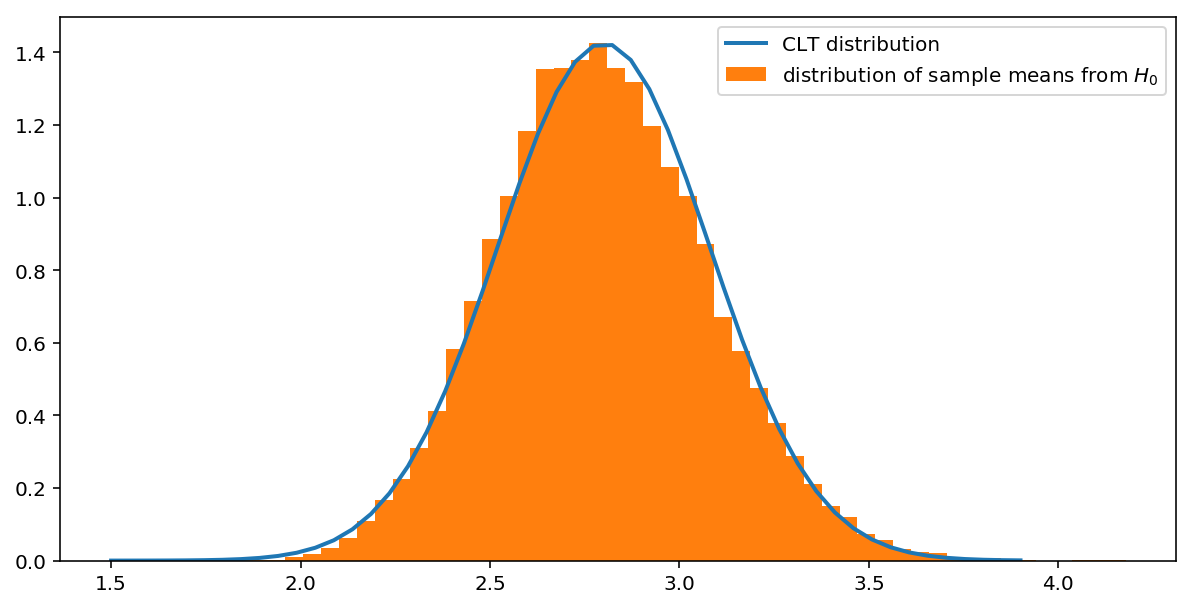

In [26]:
meanspace = np.linspace(1.5, 3.9)

plt.figure(figsize=(10,5))
plt.plot( meanspace, clt_sample_dist.pdf(meanspace), lw=2, label="CLT distribution" )

plt.hist( group_means, bins=50, density=True, label="distribution of sample means from $H_0$" )
plt.legend()
plt.show()

The closed-form CLT distribution aligns well with the distribution of sample means - we can simply use the closed-form solution.

In [27]:
clt_sample_dist.cdf(idle_sample.mean())

0.08324486094850198

Unfortunately, this is only true for **sufficiently large sample sizes**. Let's take a look at what happens for smaller sample sizes:

## Hypothesis testing on small sample sizes

Can we use all this machinery with a small sample size?

In [28]:
group_size = 7

np.random.seed(22)
idle_sample = scs.expon(scale=2.6).rvs(group_size).round(2)
idle_sample

array([0.61, 1.71, 1.42, 5.1 , 0.49, 1.08, 0.82])

In [29]:
idle_sample.mean()

1.6042857142857143

In [30]:
n_samples = 30000
group_means = dist.rvs(size=(n_samples,group_size)).mean(axis=1)

In [31]:
clt_sample_dist = scs.norm(loc=beta, scale=beta/group_size**0.5)

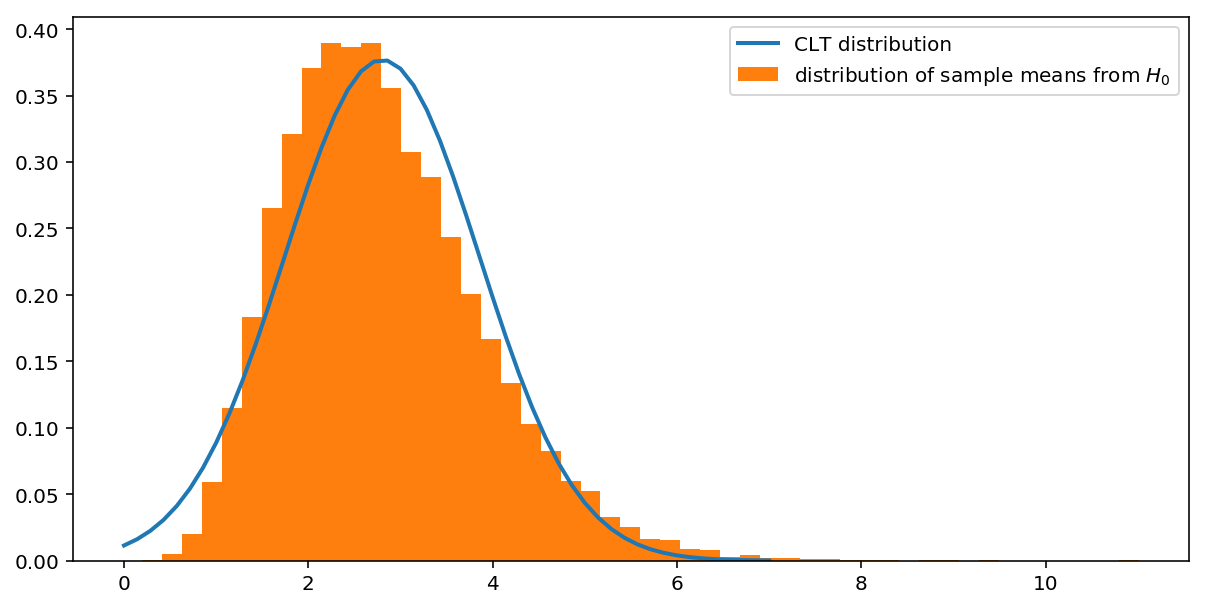

In [32]:
meanspace = np.linspace(0, 7)

plt.figure(figsize=(10,5))
plt.plot( meanspace, clt_sample_dist.pdf(meanspace), lw=2, label="CLT distribution" )

plt.hist( group_means, bins=50, density=True, label="distribution of sample means from $H_0$" )
plt.legend()
plt.show()

**TODO** T-test I guess???

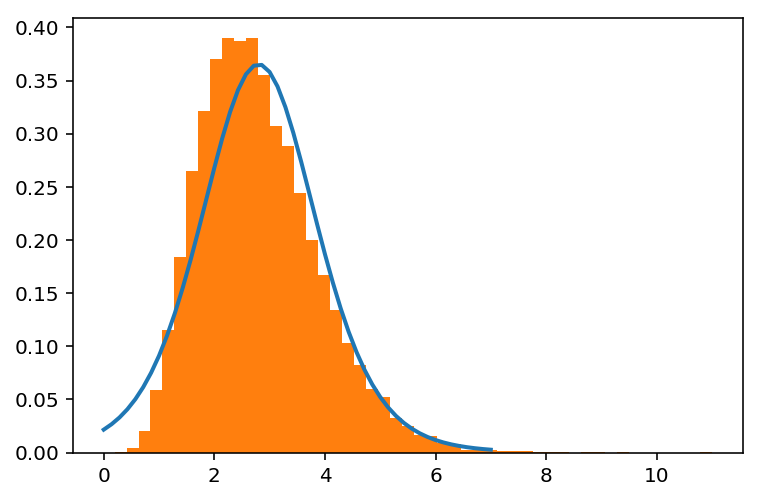

In [33]:
t_dist =  scs.t(df=8, loc=beta, scale=beta/group_size**0.5 )

plt.plot( meanspace, t_dist.pdf(meanspace), lw=2, label="CLT distribution" )
plt.hist( group_means, bins=50, density=True, label="distribution of sample means from $H_0$" )
plt.show()

Imagine we have **omniscient** knowledge of the size of **all** dogs and cats **ever**. The weight of dogs and cats are normally distributed with the following parameters.

In [52]:
cat_mean = 6.5 #lb
cat_std = 1.5 #lb
cat_dist = scs.norm(loc=cat_mean, scale=cat_std)

dog_mean = 20 #lb
dog_std = 5.5 #lb
dog_dist = scs.norm(loc=dog_mean, scale=dog_std)

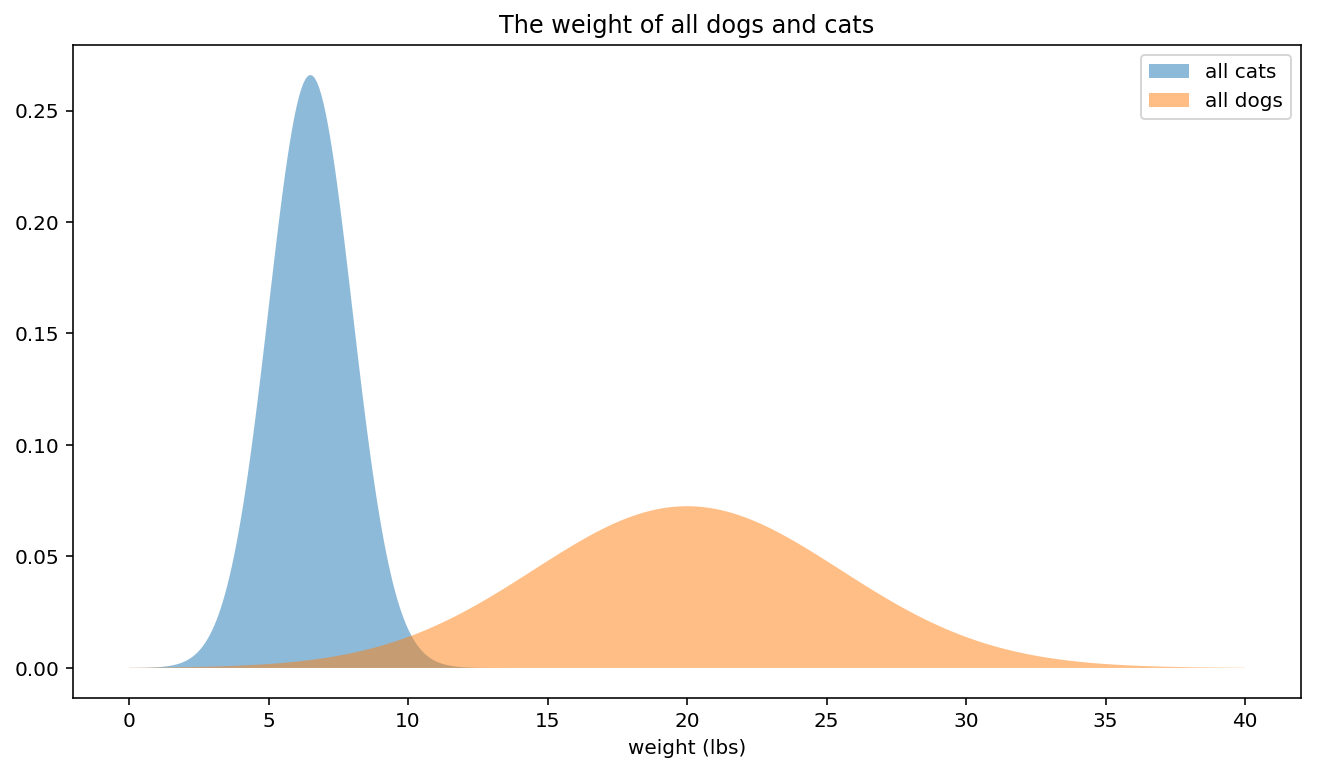

In [73]:
weight = np.linspace(0,40,500)
plt.figure(figsize=(11,6))
plt.fill_between( weight, 0, cat_dist.pdf(weight), alpha=0.5, label="all cats" )
plt.fill_between( weight, 0, dog_dist.pdf(weight), alpha=0.5, label="all dogs" )
plt.xlabel("weight (lbs)")
plt.title("The weight of all dogs and cats")
plt.legend()
plt.show()

Imagine I have an 11 pound cat and a 10 pound dog. I might wonder - how common is it for a cat to weigh more than a dog?

Well, we could take look at some large number of random pairs of dogs and cats, and count the fraction of pairs where the cat weighs more than the dog.

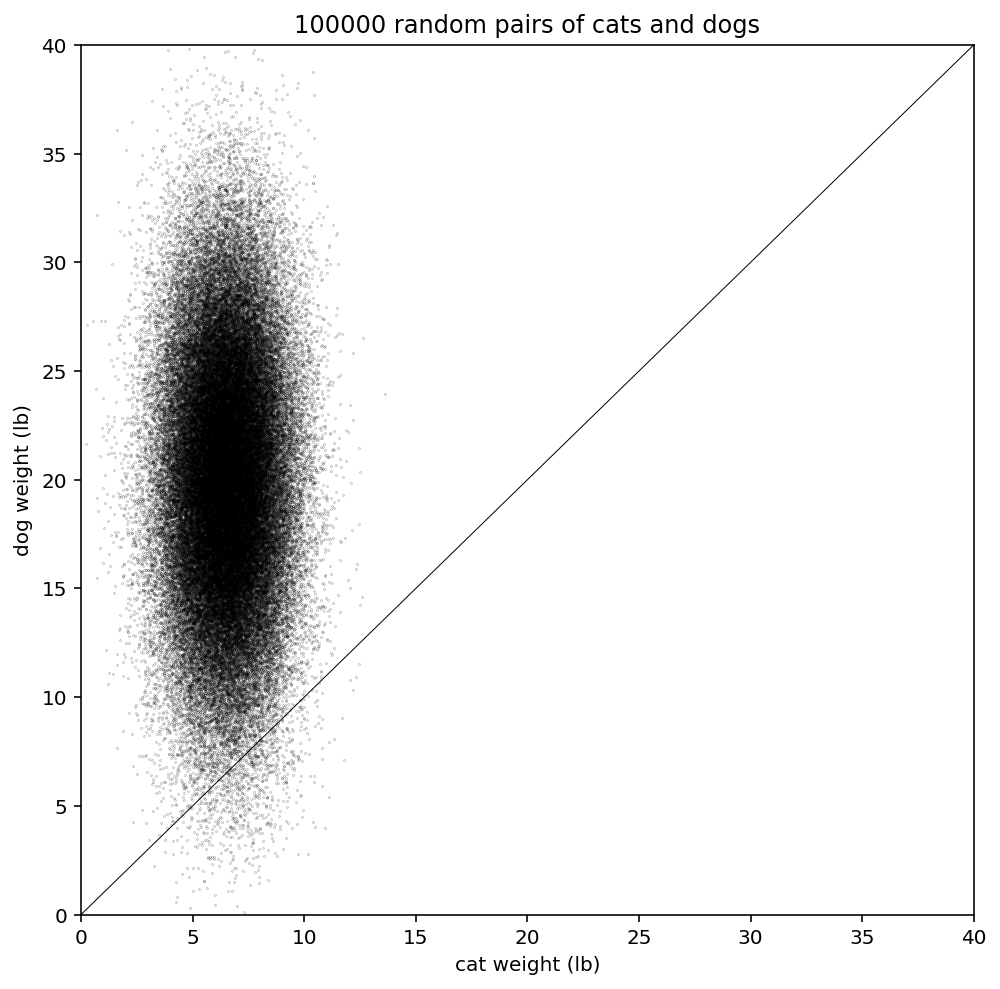

In [102]:
n = 100000
lots_of_cats = cat_dist.rvs(n)
lots_of_dogs = dog_dist.rvs(n)

plt.figure(figsize=(8,8))
plt.scatter( lots_of_cats, lots_of_dogs, s=0.01, c="black" )
plt.xlim(0,40)
plt.ylim(0,40)
plt.plot([0,40],[0,40], lw=0.5, c="black")
plt.xlabel("cat weight (lb)")
plt.ylabel("dog weight (lb)")
plt.title("%d random pairs of cats and dogs"%n)
plt.show()

In [107]:
(lots_of_cats>lots_of_dogs).sum() / n

0.00889

Here's 100000 random cat/dog pairs. In this sample, about 0.9% of the time a random cat weighs more than a random dog.